<a href="https://colab.research.google.com/github/prashanthvijayaraja-tmu/CIND-820/blob/main/mixed_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mixed-naive-bayes

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from mixed_naive_bayes import MixedNB

In [ ]:
df = pd.read_csv("model_df.csv")
df

,Unnamed: 0,posted_speed_limit,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,damage,prim_contributory_cause,sec_contributory_cause,injuries_total,crash_hour,crash_day_of_week,crash_month,severity
0,0,30,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,3.0,19,3,9,9.0
1,1,50,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",FOLLOWING TOO CLOSELY,FOLLOWING TOO CLOSELY,0.0,18,6,9,2.0
2,2,30,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",FAILING TO REDUCE SPEED TO AVOID CRASH,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...",0.0,14,7,7,1.0
3,3,30,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE,0.0,23,4,8,2.0
4,4,15,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",FOLLOWING TOO CLOSELY,DISTRACTION - FROM INSIDE VEHICLE,1.0,12,6,8,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769976,794951,30,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",IMPROPER BACKING,UNABLE TO DETERMINE,0.0,7,2,11,1.0
769977,794952,30,NO CONTROLS,UNKNOWN,UNKNOWN,SIDESWIPE SAME DIRECTION,OTHER,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,"$501 - $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,0.0,18,3,10,2.0
769978,794953,30,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",IMPROPER BACKING,IMPROPER BACKING,0.0,23,7,11,1.0
769979,794954,30,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,0.0,18,2,11,4.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769981 entries, 0 to 769980
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               769981 non-null  int64  
 1   posted_speed_limit       769981 non-null  int64  
 2   device_condition         769981 non-null  object 
 3   weather_condition        769981 non-null  object 
 4   lighting_condition       769981 non-null  object 
 5   first_crash_type         769981 non-null  object 
 6   trafficway_type          769981 non-null  object 
 7   alignment                769981 non-null  object 
 8   roadway_surface_cond     769981 non-null  object 
 9   road_defect              769981 non-null  object 
 10  crash_type               769981 non-null  object 
 11  damage                   769981 non-null  object 
 12  prim_contributory_cause  769981 non-null  object 
 13  sec_contributory_cause   769981 non-null  object 
 14  inju

In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769981 entries, 0 to 769980
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   posted_speed_limit       769981 non-null  int64  
 1   device_condition         769981 non-null  object 
 2   weather_condition        769981 non-null  object 
 3   lighting_condition       769981 non-null  object 
 4   first_crash_type         769981 non-null  object 
 5   trafficway_type          769981 non-null  object 
 6   alignment                769981 non-null  object 
 7   roadway_surface_cond     769981 non-null  object 
 8   road_defect              769981 non-null  object 
 9   crash_type               769981 non-null  object 
 10  damage                   769981 non-null  object 
 11  prim_contributory_cause  769981 non-null  object 
 12  sec_contributory_cause   769981 non-null  object 
 13  injuries_total           769981 non-null  float64
 14  cras

In [ ]:
df

,posted_speed_limit,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,damage,prim_contributory_cause,sec_contributory_cause,injuries_total,crash_hour,crash_day_of_week,crash_month,severity
0,30,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,3.0,19,3,9,9.0
1,50,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",FOLLOWING TOO CLOSELY,FOLLOWING TOO CLOSELY,0.0,18,6,9,2.0
2,30,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",FAILING TO REDUCE SPEED TO AVOID CRASH,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...",0.0,14,7,7,1.0
3,30,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE,0.0,23,4,8,2.0
4,15,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",FOLLOWING TOO CLOSELY,DISTRACTION - FROM INSIDE VEHICLE,1.0,12,6,8,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769976,30,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",IMPROPER BACKING,UNABLE TO DETERMINE,0.0,7,2,11,1.0
769977,30,NO CONTROLS,UNKNOWN,UNKNOWN,SIDESWIPE SAME DIRECTION,OTHER,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,"$501 - $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,0.0,18,3,10,2.0
769978,30,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",IMPROPER BACKING,IMPROPER BACKING,0.0,23,7,11,1.0
769979,30,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,0.0,18,2,11,4.0


In [ ]:
print('Column names in the dataset are: \n{}'.format(('\n').join(df.columns)))

Column names in the dataset are: 
posted_speed_limit
device_condition
weather_condition
lighting_condition
first_crash_type
trafficway_type
alignment
roadway_surface_cond
road_defect
crash_type
damage
prim_contributory_cause
sec_contributory_cause
injuries_total
crash_hour
crash_day_of_week
crash_month
severity


In [ ]:
X = df.drop(columns='severity')
y = df['severity']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769981 entries, 0 to 769980
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   posted_speed_limit       769981 non-null  int64  
 1   device_condition         769981 non-null  object 
 2   weather_condition        769981 non-null  object 
 3   lighting_condition       769981 non-null  object 
 4   first_crash_type         769981 non-null  object 
 5   trafficway_type          769981 non-null  object 
 6   alignment                769981 non-null  object 
 7   roadway_surface_cond     769981 non-null  object 
 8   road_defect              769981 non-null  object 
 9   crash_type               769981 non-null  object 
 10  damage                   769981 non-null  object 
 11  prim_contributory_cause  769981 non-null  object 
 12  sec_contributory_cause   769981 non-null  object 
 13  injuries_total           769981 non-null  float64
 14  cras

In [ ]:
numerical_features = []
categorical_features = []
for column in X.columns:
    if (df[column].dtype == 'float64' or df[column].dtype == 'int64'):
        numerical_features.append(column)
    elif (df[column].dtype == 'object' or df[column].dtype == 'bool'):
        categorical_features.append(column)

In [ ]:
print('There are a total of {} numerical features in the dataset.'.format(len(numerical_features)))
numerical_features

There are a total of 5 numerical features in the dataset.


['posted_speed_limit',
 'injuries_total',
 'crash_hour',
 'crash_day_of_week',
 'crash_month']

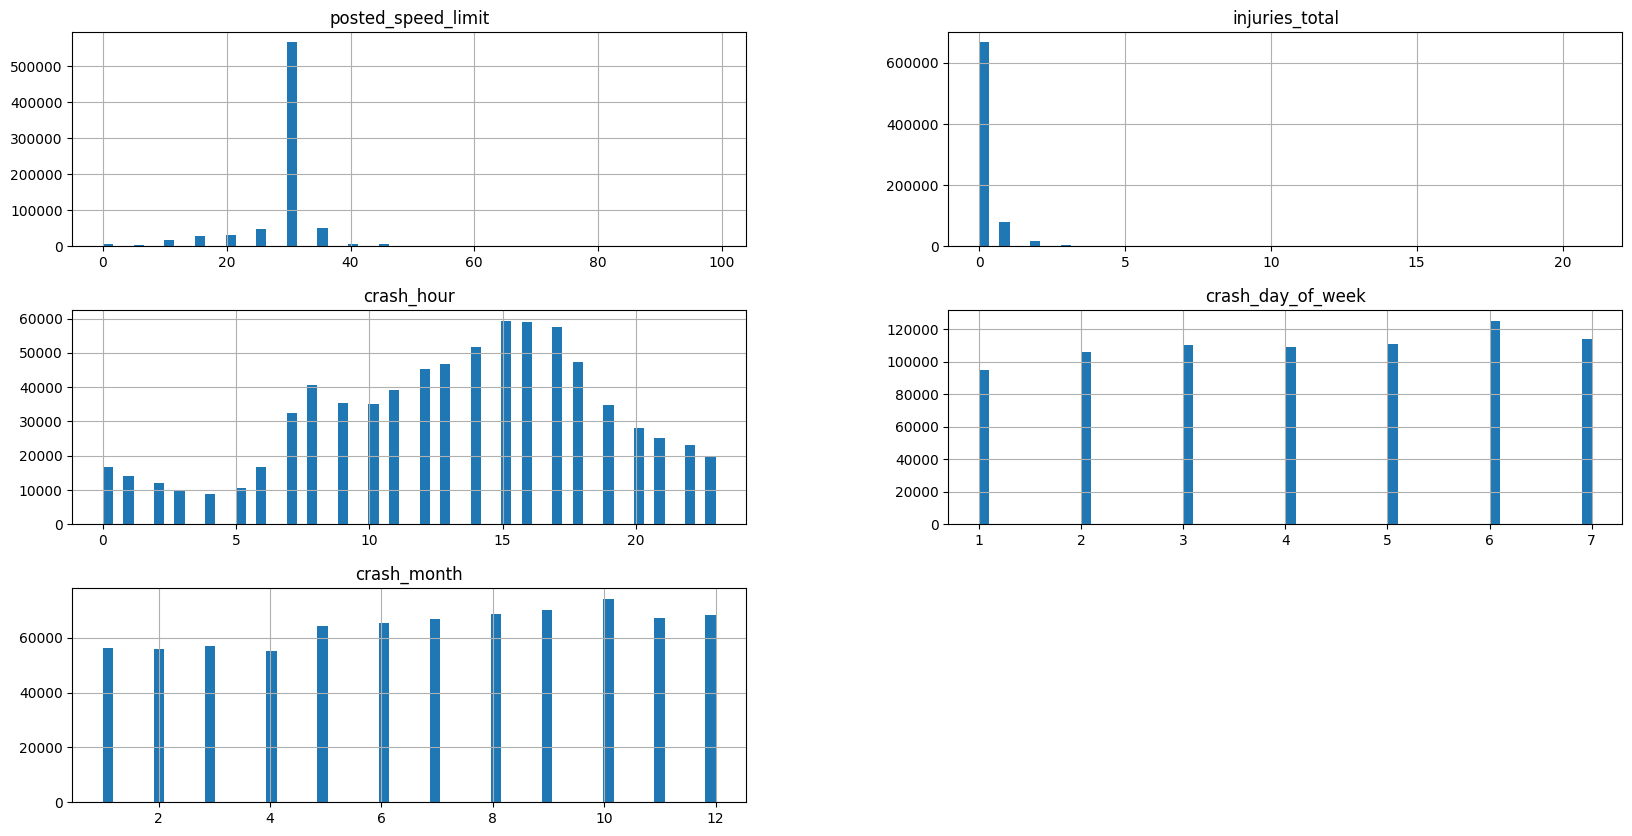

In [ ]:
X_num_total = X[numerical_features]
X_num_total.hist(bins=60,figsize=(20, 10))
plt.show()

In [ ]:
X_cat_total = X[categorical_features]
print('Unique values for each categorical column are:\n {}'.format(X_cat_total.nunique()))

Unique values for each categorical column are:
 device_condition            8
weather_condition          12
lighting_condition          6
first_crash_type           18
trafficway_type            20
alignment                   6
roadway_surface_cond        7
road_defect                 7
crash_type                  2
damage                      3
prim_contributory_cause    40
sec_contributory_cause     40
dtype: int64


In [ ]:
# categorical feature list
categorical_features_index = list()
# Encode categorical features, get the indexes of categorical
for i in categorical_features:
    categorical_features_index.append(X.columns.get_loc(i))
    X[i] = LabelEncoder().fit_transform(X[i])

In [ ]:
X.head()

,posted_speed_limit,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,damage,prim_contributory_cause,sec_contributory_cause,injuries_total,crash_hour,crash_day_of_week,crash_month
0,30,1,2,4,0,5,3,0,1,0,2,36,26,3.0,19,3,9
1,50,3,2,1,10,3,3,0,1,1,2,19,19,0.0,18,6,9
2,30,1,2,3,7,2,3,0,1,1,2,17,28,0.0,14,7,7
3,30,3,2,1,15,8,3,0,1,1,2,18,26,0.0,23,4,8
4,15,1,2,3,10,11,3,0,1,0,2,19,8,1.0,12,6,8


In [ ]:
y = LabelEncoder().fit_transform(y)

In [ ]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size = 0.2, random_state = 18)

In [ ]:
mixed_nb_alpha = [0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0]

In [ ]:
mixedNB_validation_misclassification_rates = list()
for alpha in mixed_nb_alpha:
    mixedNB = MixedNB(categorical_features=categorical_features_index, alpha=alpha)
    mixedNB.fit(X_train,y_train)
    y_hat_valid = mixedNB.predict(X_valid)
    mixedNB_validation_misclassification_rates.append(sum(y_hat_valid != y_valid)/ len(y_valid))

/usr/local/lib/python3.10/dist-packages/mixed_naive_bayes/mixed_naive_bayes.py:367: UserWarning: alpha too small will result in numeric errors, setting alpha = 1e-10
  warnings.warn('alpha too small will result in numeric errors, '


In [ ]:
bestK_mixedNB = np.argmin(mixedNB_validation_misclassification_rates) + 1
print("The best K value is: {}".format(bestK_mixedNB))

The best K value is: 1


In [ ]:
print('The best alpha value for mixed Naïve Bayes is: {}'.format(mixed_nb_alpha[bestK_mixedNB]))

The best alpha value for mixed Naïve Bayes is: 1.0


In [ ]:
mixedNB_best_model = MixedNB(categorical_features=categorical_features_index, alpha=mixed_nb_alpha[bestK_mixedNB])
mixedNB_best_model.fit(X_train_valid,y_train_valid)

MixedNB(alpha=1.0, var_smoothing=1e-09)

In [ ]:
print("The classification accuracy on the test set for mixed Naïve Bayes is: {:.2%}".format(np.mean(mixedNB_best_model.predict(X_test) == y_test)))

The classification accuracy on the test set for mixed Naïve Bayes is: 64.29%
